# Прохоренко Олександр ФІ-21мн
## Lab 2: Базові алгоритми навчання без учителя та обробка текстових даних (Scikit-learn lib)

## 1. Зниження розмірності і візуалізація даних
### Breast Cancer Wisconsin (Diagnostic) Data Set
### https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [204]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("data.csv")

In [205]:
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
x_data=data.iloc[:,1:].values
y_data=data.iloc[:,0].values
scaler = StandardScaler()
x_data = scaler.fit_transform(x_data)

### PCA

Explained:  0.6324320765155935


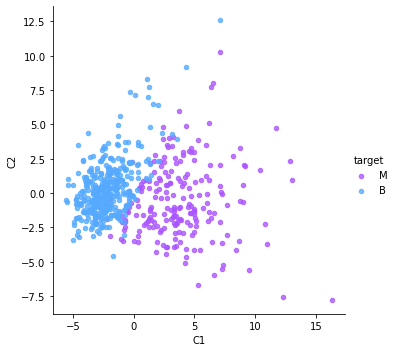

In [206]:
pca = PCA(n_components=2)
pca_data=pd.DataFrame(pca.fit_transform(x_data), columns=['C1','C2'])
print("Explained: ", sum(pca.explained_variance_ratio_))
pca_data['target']=y_data
sns.lmplot('C1', 'C2', fit_reg=False, data=pca_data, scatter_kws={"s": 20}, hue="target", palette='cool_r')

### TSNE

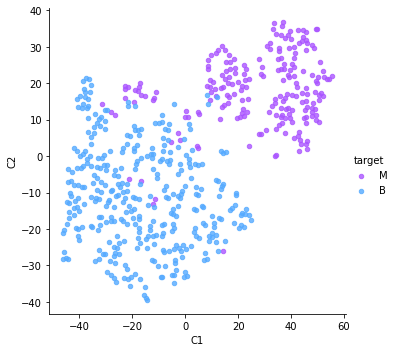

In [207]:
tsne = TSNE(perplexity = 15)
tsne_data=pd.DataFrame(tsne.fit_transform(x_data), columns=['C1','C2'])
tsne_data['target']=y_data
sns.lmplot('C1', 'C2', fit_reg=False, data=tsne_data, scatter_kws={"s": 20}, hue="target", palette='cool_r')

## 2. Кластерний аналіз

In [208]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

In [209]:
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

def dopic(image_array, n_colors):
    image_array_sample = shuffle(image_array, random_state=0, n_samples=10000)
    kmeans = KMeans(n_clusters=n_colors, n_init=10, random_state=0).fit(image_array_sample)
    labels = kmeans.predict(image_array)
    codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
    labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
    return kmeans, labels, codebook_random, labels_random, n_colors

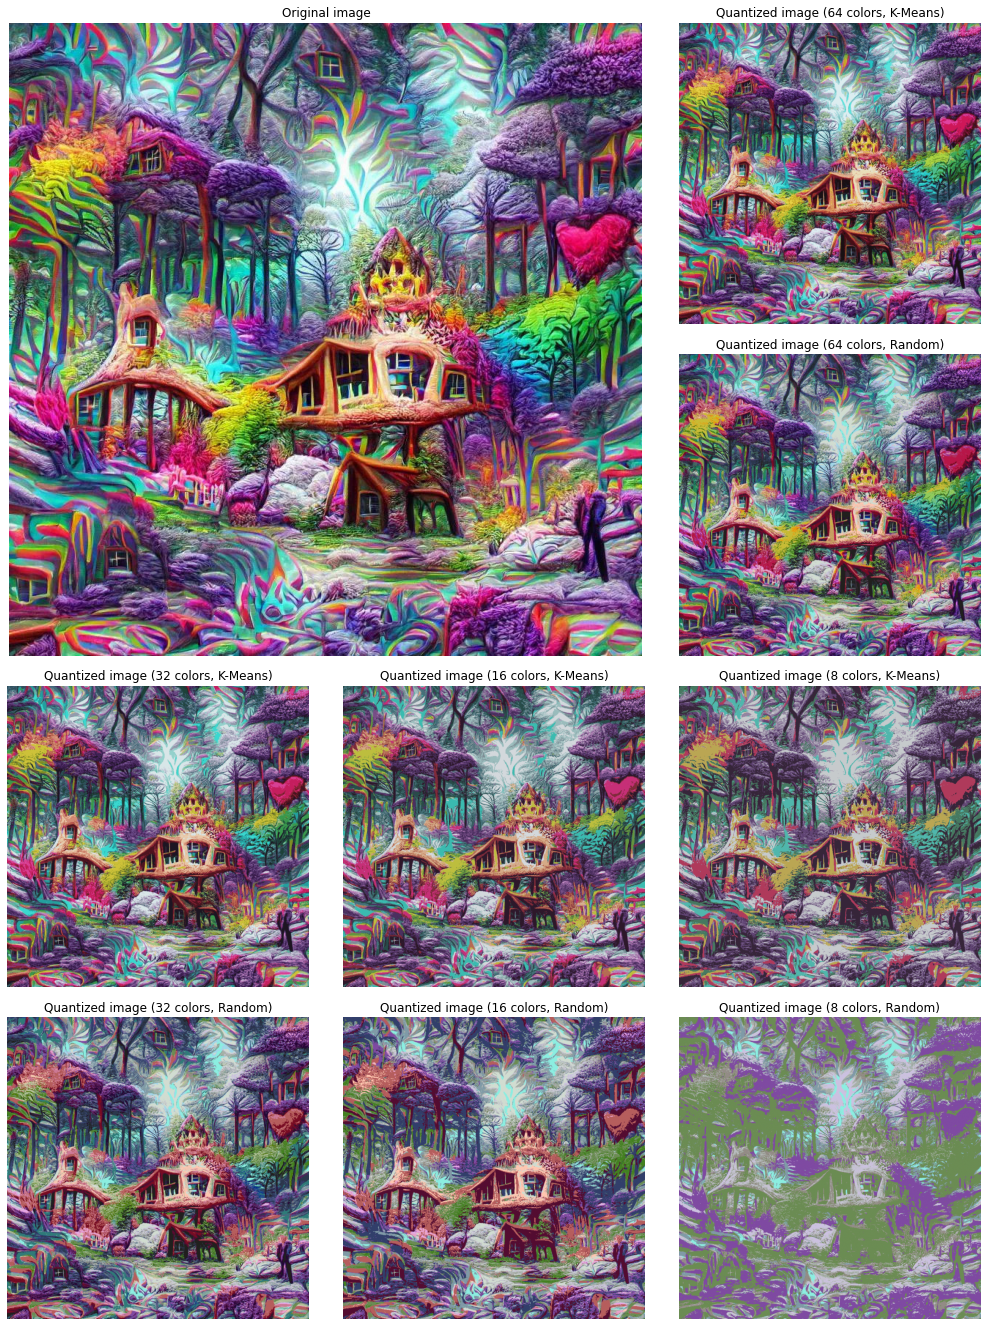

In [210]:
pic = plt.imread('pic.jpg')
pic = np.array(pic, dtype=np.float64) / 255
w, h, d = original_shape = tuple(pic.shape)
assert d == 3
image_array = np.reshape(pic, (w * h, d))


fig = plt.figure(figsize = (40, 30), constrained_layout=False)
#gs0 = gridspec.GridSpec(4, 3, figure=fig)
gs0 = fig.add_gridspec(nrows=4, ncols=3, left=0, bottom=0, top = 0.6, right=0.35, hspace = 0.1, wspace=0)
#Orig
gs00 = fig.add_subplot(gs0[:2,:-1])
gs00.axis("off")
gs00.set_title("Original image")
gs00.imshow(pic)

#64
kmeans, labels, codebook_random, labels_random, n_colors = dopic(image_array, 64)
gs01 = fig.add_subplot(gs0[0,-1])
gs01.axis("off")
gs01.set_title(f"Quantized image ({n_colors} colors, K-Means)")
gs01.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

gs02 = fig.add_subplot(gs0[1,-1])
gs02.axis("off")
gs02.set_title(f"Quantized image ({n_colors} colors, Random)")
gs02.imshow(recreate_image(codebook_random, labels_random, w, h))

#32
kmeans, labels, codebook_random, labels_random, n_colors = dopic(image_array, 32)
gs10 = fig.add_subplot(gs0[2,:-2])
gs10.axis("off")
gs10.set_title(f"Quantized image ({n_colors} colors, K-Means)")
gs10.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

gs20 = fig.add_subplot(gs0[3:,:-2])
gs20.axis("off")
gs20.set_title(f"Quantized image ({n_colors} colors, Random)")
gs20.imshow(recreate_image(codebook_random, labels_random, w, h))

#16
kmeans, labels, codebook_random, labels_random, n_colors = dopic(image_array, 16)
gs11 = fig.add_subplot(gs0[2,-2])
gs11.axis("off")
gs11.set_title(f"Quantized image ({n_colors} colors, K-Means)")
gs11.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

gs21 = fig.add_subplot(gs0[3:,-2])
gs21.axis("off")
gs21.set_title(f"Quantized image ({n_colors} colors, Random)")
gs21.imshow(recreate_image(codebook_random, labels_random, w, h))

#8
kmeans, labels, codebook_random, labels_random, n_colors = dopic(image_array, 8)
gs12 = fig.add_subplot(gs0[2,-1])
gs12.axis("off")
gs12.set_title(f"Quantized image ({n_colors} colors, K-Means)")
gs12.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

gs22 = fig.add_subplot(gs0[3:,-1])
gs22.axis("off")
gs22.set_title(f"Quantized image ({n_colors} colors, Random)")
gs22.imshow(recreate_image(codebook_random, labels_random, w, h))

plt.show()

## 3. Обробка та класифікація текстових даних
### Physics vs Chemistry vs Biology
### https://www.kaggle.com/datasets/vivmankar/physics-vs-chemistry-vs-biology

In [211]:
train = pd.read_csv("train.csv")
train.drop(['Id'], axis=1, inplace=True)
test = pd.read_csv("test.csv")
test.drop(['Id'], axis=1, inplace=True)

In [212]:
train['Comment'] = train['Comment'].apply(lambda x: x.lower())
test['Comment'] = test['Comment'].apply(lambda x: x.lower())

In [213]:
import string

train['Comment'] = train['Comment'].apply(lambda x:"".join([i for i in x if i not in string.punctuation]))
test['Comment'] = test['Comment'].apply(lambda x:"".join([i for i in x if i not in string.punctuation]))

In [214]:
from nltk.tokenize import word_tokenize
train['Comment'] = train['Comment'].apply(word_tokenize)
test['Comment'] = test['Comment'].apply(word_tokenize)

In [215]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
train['Comment'] = train['Comment'].apply(lambda x:[i for i in x if i not in stop_words])
test['Comment'] = test['Comment'].apply(lambda x:[i for i in x if i not in stop_words])

In [216]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
train['Comment'] = train['Comment'].apply(lambda x:[porter_stemmer.stem(word) for word in x])
test['Comment'] = test['Comment'].apply(lambda x:[porter_stemmer.stem(word) for word in x])

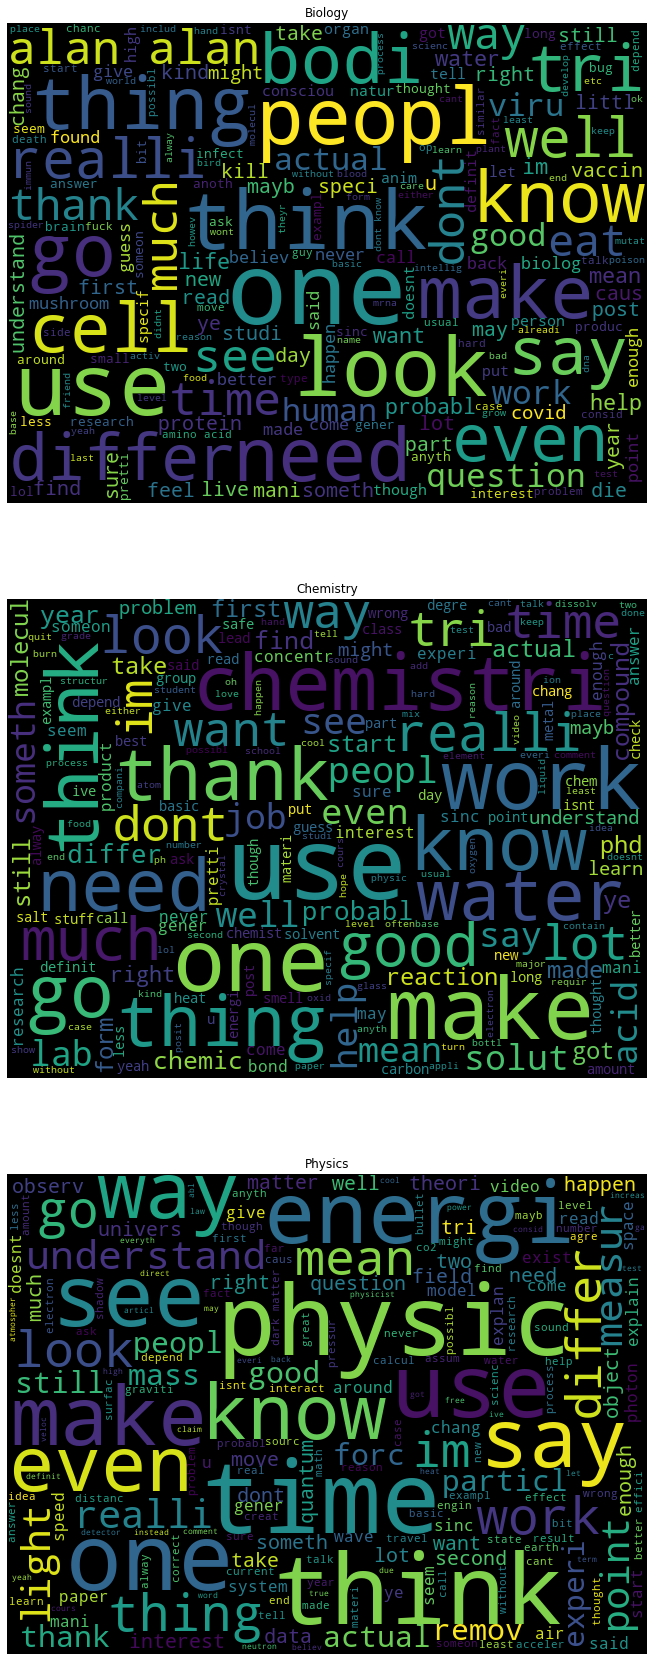

In [217]:
from wordcloud import WordCloud

biolog= " ".join(" ".join(l) for l in train[train.Topic == 'Biology']['Comment'].values)
w_biolog = WordCloud(width = 640, height = 480, random_state = 10, max_font_size = 100).generate(biolog)
chemist= " ".join(" ".join(l) for l in train[train.Topic == 'Chemistry']['Comment'].values)
w_chemist = WordCloud(width = 640, height = 480, random_state = 10, max_font_size = 100).generate(chemist)
physic= " ".join(" ".join(l) for l in train[train.Topic == 'Physics']['Comment'].values)
w_physic = WordCloud(width = 640, height = 480, random_state = 10, max_font_size = 100).generate(physic)

plt.figure(1, figsize = (40, 30) )
plt.subplot(311)
plt.imshow(w_biolog, interpolation = "bilinear")
plt.title("Biology")
plt.axis('off')
plt.subplot(312)
plt.imshow(w_chemist, interpolation = "bilinear")
plt.title("Chemistry")
plt.axis('off')
plt.subplot(313)
plt.imshow(w_physic, interpolation = "bilinear")
plt.title("Physics")
plt.axis('off')
plt.show()

In [218]:
from sklearn.feature_extraction.text import TfidfVectorizer

def dummy(tokens):
    return tokens

train['Topic'].replace(to_replace=['Biology', 'Physics', 'Chemistry'], value=[1, 2, 3], inplace=True)
test['Topic'].replace(to_replace=['Biology', 'Physics', 'Chemistry'], value=[1, 2, 3], inplace=True)
tfidf_vectorizer = TfidfVectorizer(tokenizer=dummy, preprocessor=dummy)
x_train=train['Comment'].values
y_train=train['Topic']
x_test=test['Comment'].values
y_test=test['Topic']
x_train_vectors_tfidf = tfidf_vectorizer.fit_transform(x_train) 
x_test_vectors_tfidf = tfidf_vectorizer.transform(x_test)

In [220]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rm = RandomForestClassifier()
rm = rm.fit(x_train_vectors_tfidf,y_train)
y_pred_rm = rm.predict(x_test_vectors_tfidf)

print("Accuracy: ",accuracy_score(y_test, y_pred_rm))

Accuracy:  0.7799495586380832
